# Dataset : Hospital No-show Analysis

## Step 0: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 1: Questions

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

## Step 2: Wrangle Data

In [64]:
df = pd.read_csv('data.csv', parse_dates=['ScheduledDay', 'AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [65]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### No data is missing in the dataset

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


### Removing irrelevant values for Age

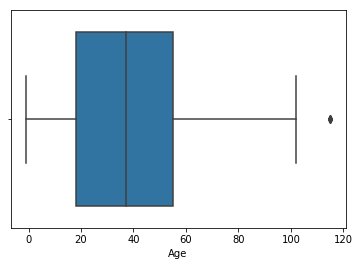

In [67]:
sns.boxplot(df['Age'])

In [68]:
df = df[ (df['Age'] <=100) & (df['Age']>0)]

## Step 3: EDA

### Defining one function that calculates the probability of No-show given a group by on a particular column

In [69]:
def findProb(groupby ,  df, return_dict=False):
    
    groupby.append('No-show')
    lst = []
    lst_key= {}
    df_temp = df.groupby(groupby).count()
    #print(df_temp)
    for i in range(0,len(df_temp),2):
        #print(df_temp['PatientId'][i+1] , df_temp['PatientId'][i])
        #print(df_temp.index[i][0])
        lst.append(df_temp['PatientId'].iloc[i+1] / (df_temp['PatientId'].iloc[i]+df_temp['PatientId'].iloc[i+1]))
        lst_key[df_temp.index[i][0]] = df_temp['PatientId'].iloc[i+1] / (df_temp['PatientId'].iloc[i]+df_temp['PatientId'].iloc[i+1])
        #i = i+2
    if(return_dict):
        return lst_key
    return lst

In [70]:
df_count = df['No-show'].value_counts()
df_count

No     85303
Yes    21677
Name: No-show, dtype: int64

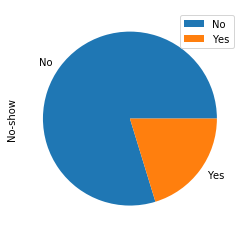

In [71]:
df_count.plot(kind='pie', legend=True, figsize=(4,4))

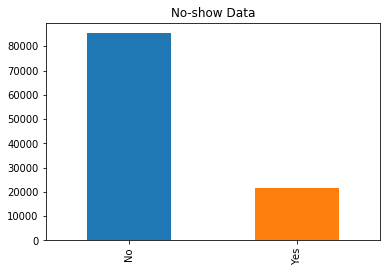

In [72]:
df_count.plot(kind='bar',title="No-show Data")

### Analysis based on Gender

In [73]:
count_gender = findProb(['Gender'],df, True)

### Women see doctor more often than men

Text(0.5, 1.0, 'No of no shows based on Gender')

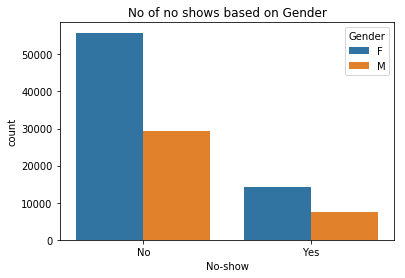

In [74]:
sns.countplot(df['No-show'], hue=df['Gender'])
plt.title('No of no shows based on Gender')

### 20 % of the people don't show up on Appointments on Average be it a Male or a Female

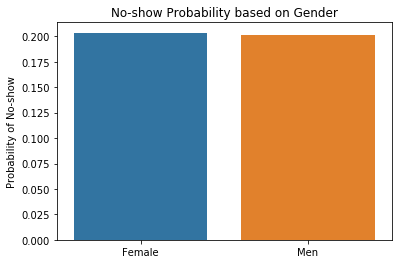

In [75]:
sns.barplot(x= ['Female','Men'], y = np.array(list(count_gender.values())))
plt.title('No-show Probability based on Gender');
plt.ylabel('Probability of No-show');

### Conclusion: Not related to gender any ways

### Analysis based on the day of the week Appointment was scheduled

In [76]:
weekday = []
for i in enumerate(df.ScheduledDay):
    weekday.append(i[1].weekday())

In [77]:
df["Scheduled_Weekday"] = weekday

### Most of the appointments are scheduled on Tuesday

Text(0.5, 0, 'Scheduled Weekday')

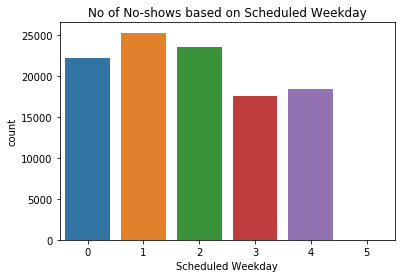

In [78]:
sns.countplot( df['Scheduled_Weekday'])
plt.title('No of No-shows based on Scheduled Weekday')
plt.xlabel('Scheduled Weekday')

In [79]:
count = findProb(['Scheduled_Weekday'] ,df, True)

### Most of the appointments scheduled on Friday have a less probability of cancelling

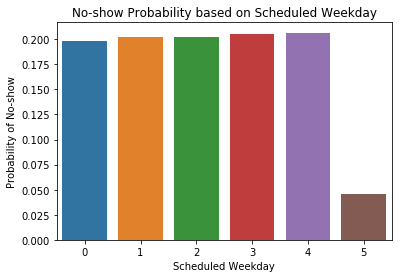

In [80]:
sns.barplot(x= np.array(list(count.keys())), y = np.array(list(count.values())))
plt.title('No-show Probability based on Scheduled Weekday');
plt.xlabel('Scheduled Weekday')
plt.ylabel('Probability of No-show');

### Conclusion: It does not really matters on which day the appointment was booked, Saturday comes out to be a day where there is low chance of No-show but we do not have enough data for Saturday to support this claim

### Analysis based on the day of the week Actual Appointment was scheduled

In [81]:
weekday_a = []
for i in enumerate(df.AppointmentDay):
    weekday_a.append(i[1].weekday())

In [82]:
df['Appointment_Weekday'] = weekday_a

### Most of the appointments are scheduled on Tuesday, Wednesday

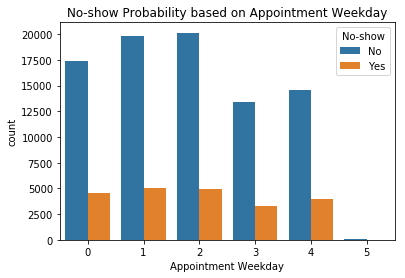

In [105]:
sns.countplot( df['Appointment_Weekday'], hue=df['No-show'])

plt.title('No-show Probability based on Appointment Weekday');
plt.xlabel('Appointment Weekday');

In [84]:
count_week = findProb(['Appointment_Weekday'], df, True)
count_week

{0: 0.20610931007716543,
 1: 0.20233588401127667,
 2: 0.1972100438421682,
 3: 0.1946445725264169,
 4: 0.21338821490467938,
 5: 0.23076923076923078}

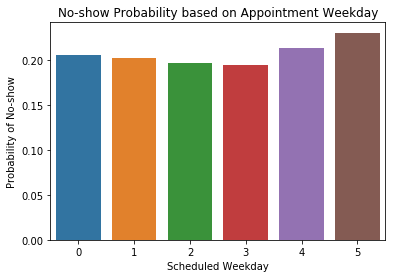

In [85]:
sns.barplot(x = np.array(list(count_week.keys())) , y=np.array(list(count_week.values())) )
plt.title('No-show Probability based on Appointment Weekday');
plt.xlabel('Scheduled Weekday')
plt.ylabel('Probability of No-show');

### Looks like Saturday is the day when people miss most appointments but we do not have enough data to support this claim

### Analysis based on the age

In [86]:
count_age = findProb(['Age'], df, True)

In [87]:
count_age

{1: 0.1825780906291245,
 2: 0.1557478368355995,
 3: 0.1830799735624587,
 4: 0.21709006928406466,
 5: 0.21490933512424445,
 6: 0.20775805391190005,
 7: 0.21093202522775054,
 8: 0.22331460674157302,
 9: 0.2653061224489796,
 10: 0.23861852433281006,
 11: 0.20669456066945607,
 12: 0.2490842490842491,
 13: 0.2747053490480508,
 14: 0.2826475849731664,
 15: 0.2658959537572254,
 16: 0.25178316690442226,
 17: 0.2624254473161034,
 18: 0.23537323470073973,
 19: 0.2550161812297735,
 20: 0.24704244954766874,
 21: 0.24449035812672176,
 22: 0.2550872093023256,
 23: 0.2542624166048925,
 24: 0.2584541062801932,
 25: 0.26426426426426425,
 26: 0.24318004676539362,
 27: 0.23892519970951343,
 28: 0.2292817679558011,
 29: 0.23521026372059872,
 30: 0.24260355029585798,
 31: 0.22237665045170257,
 32: 0.21993355481727575,
 33: 0.2283464566929134,
 34: 0.21100917431192662,
 35: 0.20972423802612483,
 36: 0.21772151898734177,
 37: 0.20678408349641225,
 38: 0.19643953345610804,
 39: 0.22135416666666666,
 40: 0.214

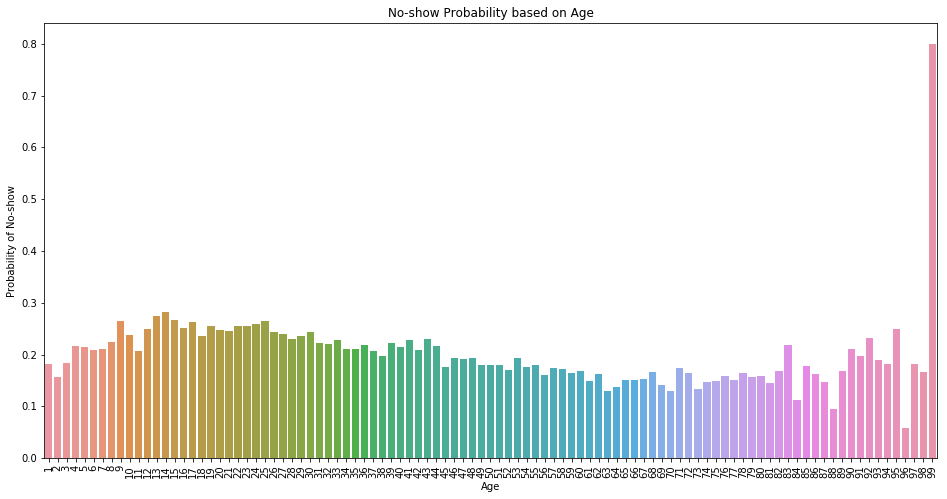

In [88]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(x = np.array(list(count_age.keys())) , y=np.array(list(count_age.values())));
plt.xticks(rotation=90);
plt.title('No-show Probability based on Age');
plt.xlabel('Age')
plt.ylabel('Probability of No-show');

### Conclusion: People close to 99 are more vulnerable to miss an appointment but there is only one record to support this claim, hence not a valid conclusion. Also in the age group of 13-17 and 22-25 they are more likely to miss an appointment

### Analysis based on the Neighbourhood

In [89]:
count_hood = findProb(['Neighbourhood'], df, True)

In [90]:
count_hood;

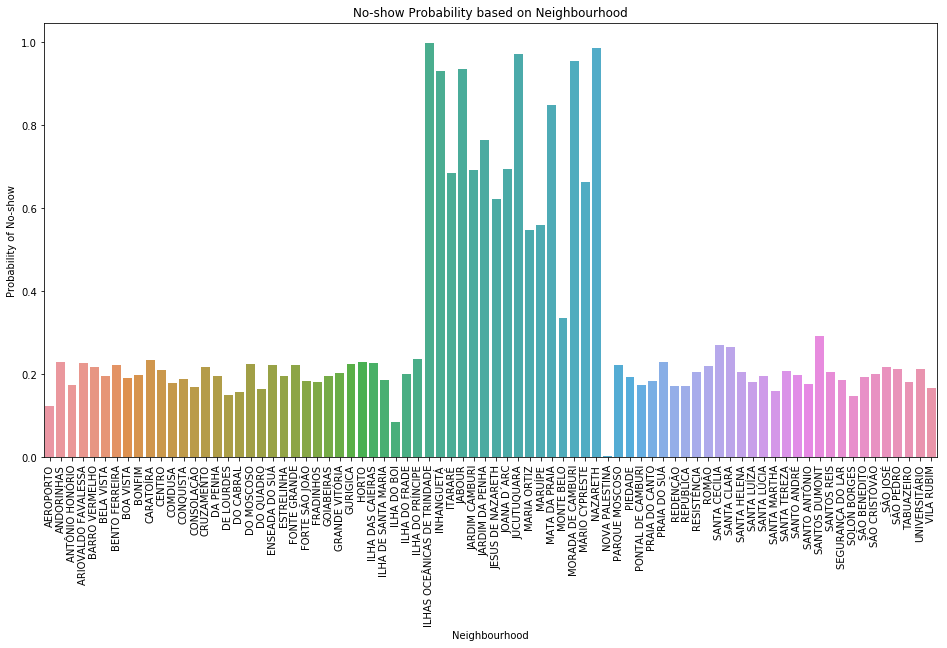

In [91]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(x = np.array(list(count_hood.keys())) , y=np.array(list(count_hood.values())));
plt.xticks(rotation=90);
plt.title('No-show Probability based on Neighbourhood');
plt.xlabel('Neighbourhood')
plt.ylabel('Probability of No-show');

### Conclusion People having Appointment in ILHAS OCEÂNICAS DE TRINDADE,
### INHANGUETÁ': 0.9311111111111111, 'JABOUR': 0.9344063164287884,
### 'JARDIM DA PENHA': 0.7651685393258427,'JESUS DE NAZARETH': 0.6227678571428571,
### 'JOANA D´ARC': 0.6940581542351454,'JUCUTUQUARA': 0.9706666666666667 
### have greater chances of no show.


### Clearly the Neighbourhood matters a lot

### Analysis based on Scholarship

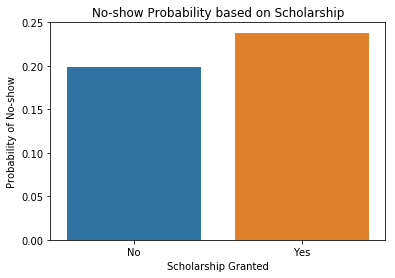

In [92]:
count_scholar = findProb(['Scholarship'], df, True)


sns.barplot(x = ['No','Yes'] , y=np.array(list(count_scholar.values())))
plt.title('No-show Probability based on Scholarship');
plt.xlabel('Scholarship Granted')
plt.ylabel('Probability of No-show');

In [101]:
df.groupby('Scholarship').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Weekday,Appointment_Weekday
Scholarship,,,,,,,,,,,,,,,
0,96171,96171,96171,96171,96171,96171,96171,96171,96171,96171,96171,96171,96171,96171,96171
1,10809,10809,10809,10809,10809,10809,10809,10809,10809,10809,10809,10809,10809,10809,10809


### Not much of a difference, people who do not have a scholarship are more likely to not miss an appointment

### Analysis based on Various Diseases


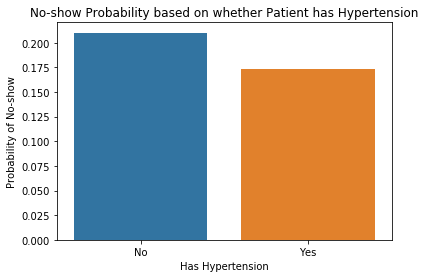

In [94]:
count_hyper = findProb(['Hipertension'], df, True)


sns.barplot(x = ['No','Yes'], y=np.array(list(count_hyper.values())))
plt.title('No-show Probability based on whether Patient has Hypertension');
plt.xlabel('Has Hypertension')
plt.ylabel('Probability of No-show');

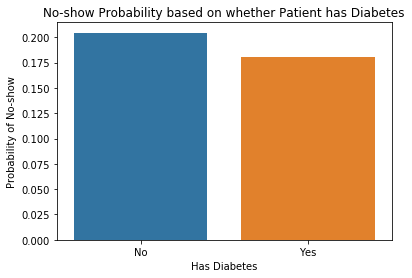

In [97]:
count_dia = findProb(['Diabetes'], df, True)


sns.barplot(x =['No', 'Yes'] , y=np.array(list(count_dia.values())))
plt.title('No-show Probability based on whether Patient has Diabetes');
plt.xlabel('Has Diabetes')
plt.ylabel('Probability of No-show');

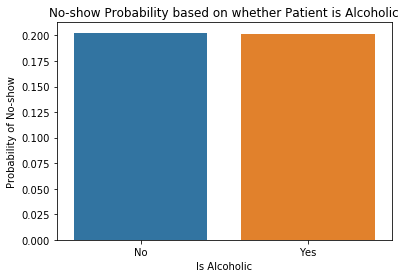

In [96]:
count_alcohal = findProb(['Alcoholism'], df, True)


sns.barplot(x = ['No', 'Yes'] , y=np.array(list(count_alcohal.values())))
plt.title('No-show Probability based on whether Patient is Alcoholic');
plt.xlabel('Is Alcoholic')
plt.ylabel('Probability of No-show');

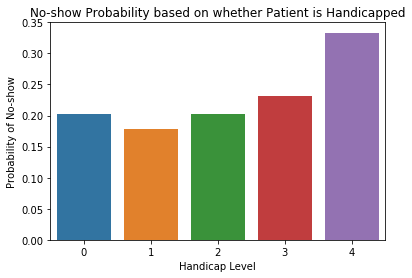

In [98]:
count_handi = findProb(['Handcap'], df, True)


sns.barplot(x = np.array(list(count_handi.keys())) , y=np.array(list(count_handi.values())))

plt.title('No-show Probability based on whether Patient is Handicapped');
plt.xlabel('Handicap Level')
plt.ylabel('Probability of No-show');

In [100]:
df.groupby('Handcap').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Scheduled_Weekday,Appointment_Weekday
Handcap,,,,,,,,,,,,,,,
0,104744,104744,104744,104744,104744,104744,104744,104744,104744,104744,104744,104744,104744,104744,104744
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037
2,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
3,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


### Conclusion: It does not matters for what a person is showing up to doctor but if a person is handicapped in level 4 then there is a 34% probability that he won't show up but we do not have enough data to support this claim

### Analysis based on the SMS

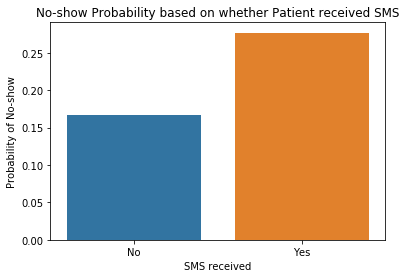

In [102]:
count_sms = findProb(['SMS_received'], df, True)


sns.barplot(x = ['No', 'Yes'] , y=np.array(list(count_sms.values())))

plt.title('No-show Probability based on whether Patient received SMS');
plt.xlabel('SMS received')
plt.ylabel('Probability of No-show');

In [103]:
df.groupby('SMS_received').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show,Scheduled_Weekday,Appointment_Weekday
SMS_received,,,,,,,,,,,,,,,
0,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396
1,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584


### Conclusion: It is so interesting to see that people who did not receive the SMS are less likely to miss an appointment as compared to people who received SMS. There is a probabilty that 28% of the people who received an SMS will not show up. Interesting, I was not expecting this

### Finding Correlation between various Variables

In [35]:
modified_df = df
modified_df['No-show'] = modified_df['No-show'].map({'Yes':1,'No':0})
modified_df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Weekday,Appointment_Weekday
PatientId,1.000000,0.004193,-0.003060,-0.002162,-0.006195,0.001882,0.011367,-0.007888,-0.008495,-0.001037,-0.001762,-0.001380
AppointmentID,0.004193,1.000000,-0.023450,0.022384,0.012086,0.022509,0.033162,0.014000,-0.254696,-0.161565,-0.006973,-0.051602
Age,-0.003060,-0.023450,1.000000,-0.112668,0.502307,0.290793,0.090461,0.073400,0.005332,-0.067183,0.007592,0.000526
Scholarship,-0.002162,0.022384,-0.112668,1.000000,-0.024534,-0.027629,0.033523,-0.009824,-0.000019,0.029384,-0.005592,-0.000778
Hipertension,-0.006195,0.012086,0.502307,-0.024534,1.000000,0.430836,0.085459,0.078377,-0.008851,-0.037253,-0.000702,0.002683
Diabetes,0.001882,0.022509,0.290793,-0.027629,0.430836,1.000000,0.016870,0.056477,-0.016143,-0.015919,-0.001164,0.006281
Alcoholism,0.011367,0.033162,0.090461,0.033523,0.085459,0.016870,1.000000,0.003897,-0.027409,-0.000510,0.006252,0.002460
Handcap,-0.007888,0.014000,0.073400,-0.009824,0.078377,0.056477,0.003897,1.000000,-0.025018,-0.006699,0.000375,0.004260
SMS_received,-0.008495,-0.254696,0.005332,-0.000019,-0.008851,-0.016143,-0.027409,-0.025018,1.000000,0.127300,0.078584,-0.092653
No-show,-0.001037,-0.161565,-0.067183,0.029384,-0.037253,-0.015919,-0.000510,-0.006699,0.127300,1.000000,0.006100,0.002076


### Removing ID variables as they not contribute at all in deciding whether a patient will turn up or not

In [36]:
modified_df.drop(columns=['PatientId', 'AppointmentID'], inplace=True)

In [37]:
modified_df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Weekday,Appointment_Weekday
Age,1.000000,-0.112668,0.502307,0.290793,0.090461,0.073400,0.005332,-0.067183,0.007592,0.000526
Scholarship,-0.112668,1.000000,-0.024534,-0.027629,0.033523,-0.009824,-0.000019,0.029384,-0.005592,-0.000778
Hipertension,0.502307,-0.024534,1.000000,0.430836,0.085459,0.078377,-0.008851,-0.037253,-0.000702,0.002683
Diabetes,0.290793,-0.027629,0.430836,1.000000,0.016870,0.056477,-0.016143,-0.015919,-0.001164,0.006281
Alcoholism,0.090461,0.033523,0.085459,0.016870,1.000000,0.003897,-0.027409,-0.000510,0.006252,0.002460
Handcap,0.073400,-0.009824,0.078377,0.056477,0.003897,1.000000,-0.025018,-0.006699,0.000375,0.004260
SMS_received,0.005332,-0.000019,-0.008851,-0.016143,-0.027409,-0.025018,1.000000,0.127300,0.078584,-0.092653
No-show,-0.067183,0.029384,-0.037253,-0.015919,-0.000510,-0.006699,0.127300,1.000000,0.006100,0.002076
Scheduled_Weekday,0.007592,-0.005592,-0.000702,-0.001164,0.006252,0.000375,0.078584,0.006100,1.000000,0.324949
Appointment_Weekday,0.000526,-0.000778,0.002683,0.006281,0.002460,0.004260,-0.092653,0.002076,0.324949,1.000000


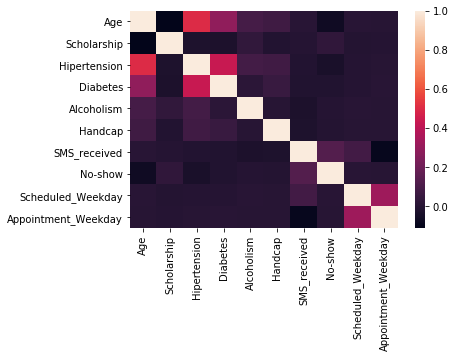

In [38]:
sns.heatmap(modified_df.corr())

### Conclusion: It turns out that Hypertension and Diabetes are closely related to each other

### Also Hypertension and Age have a positive correlation which means that as the person gets old, he has 50 %chance of getting Hypertension

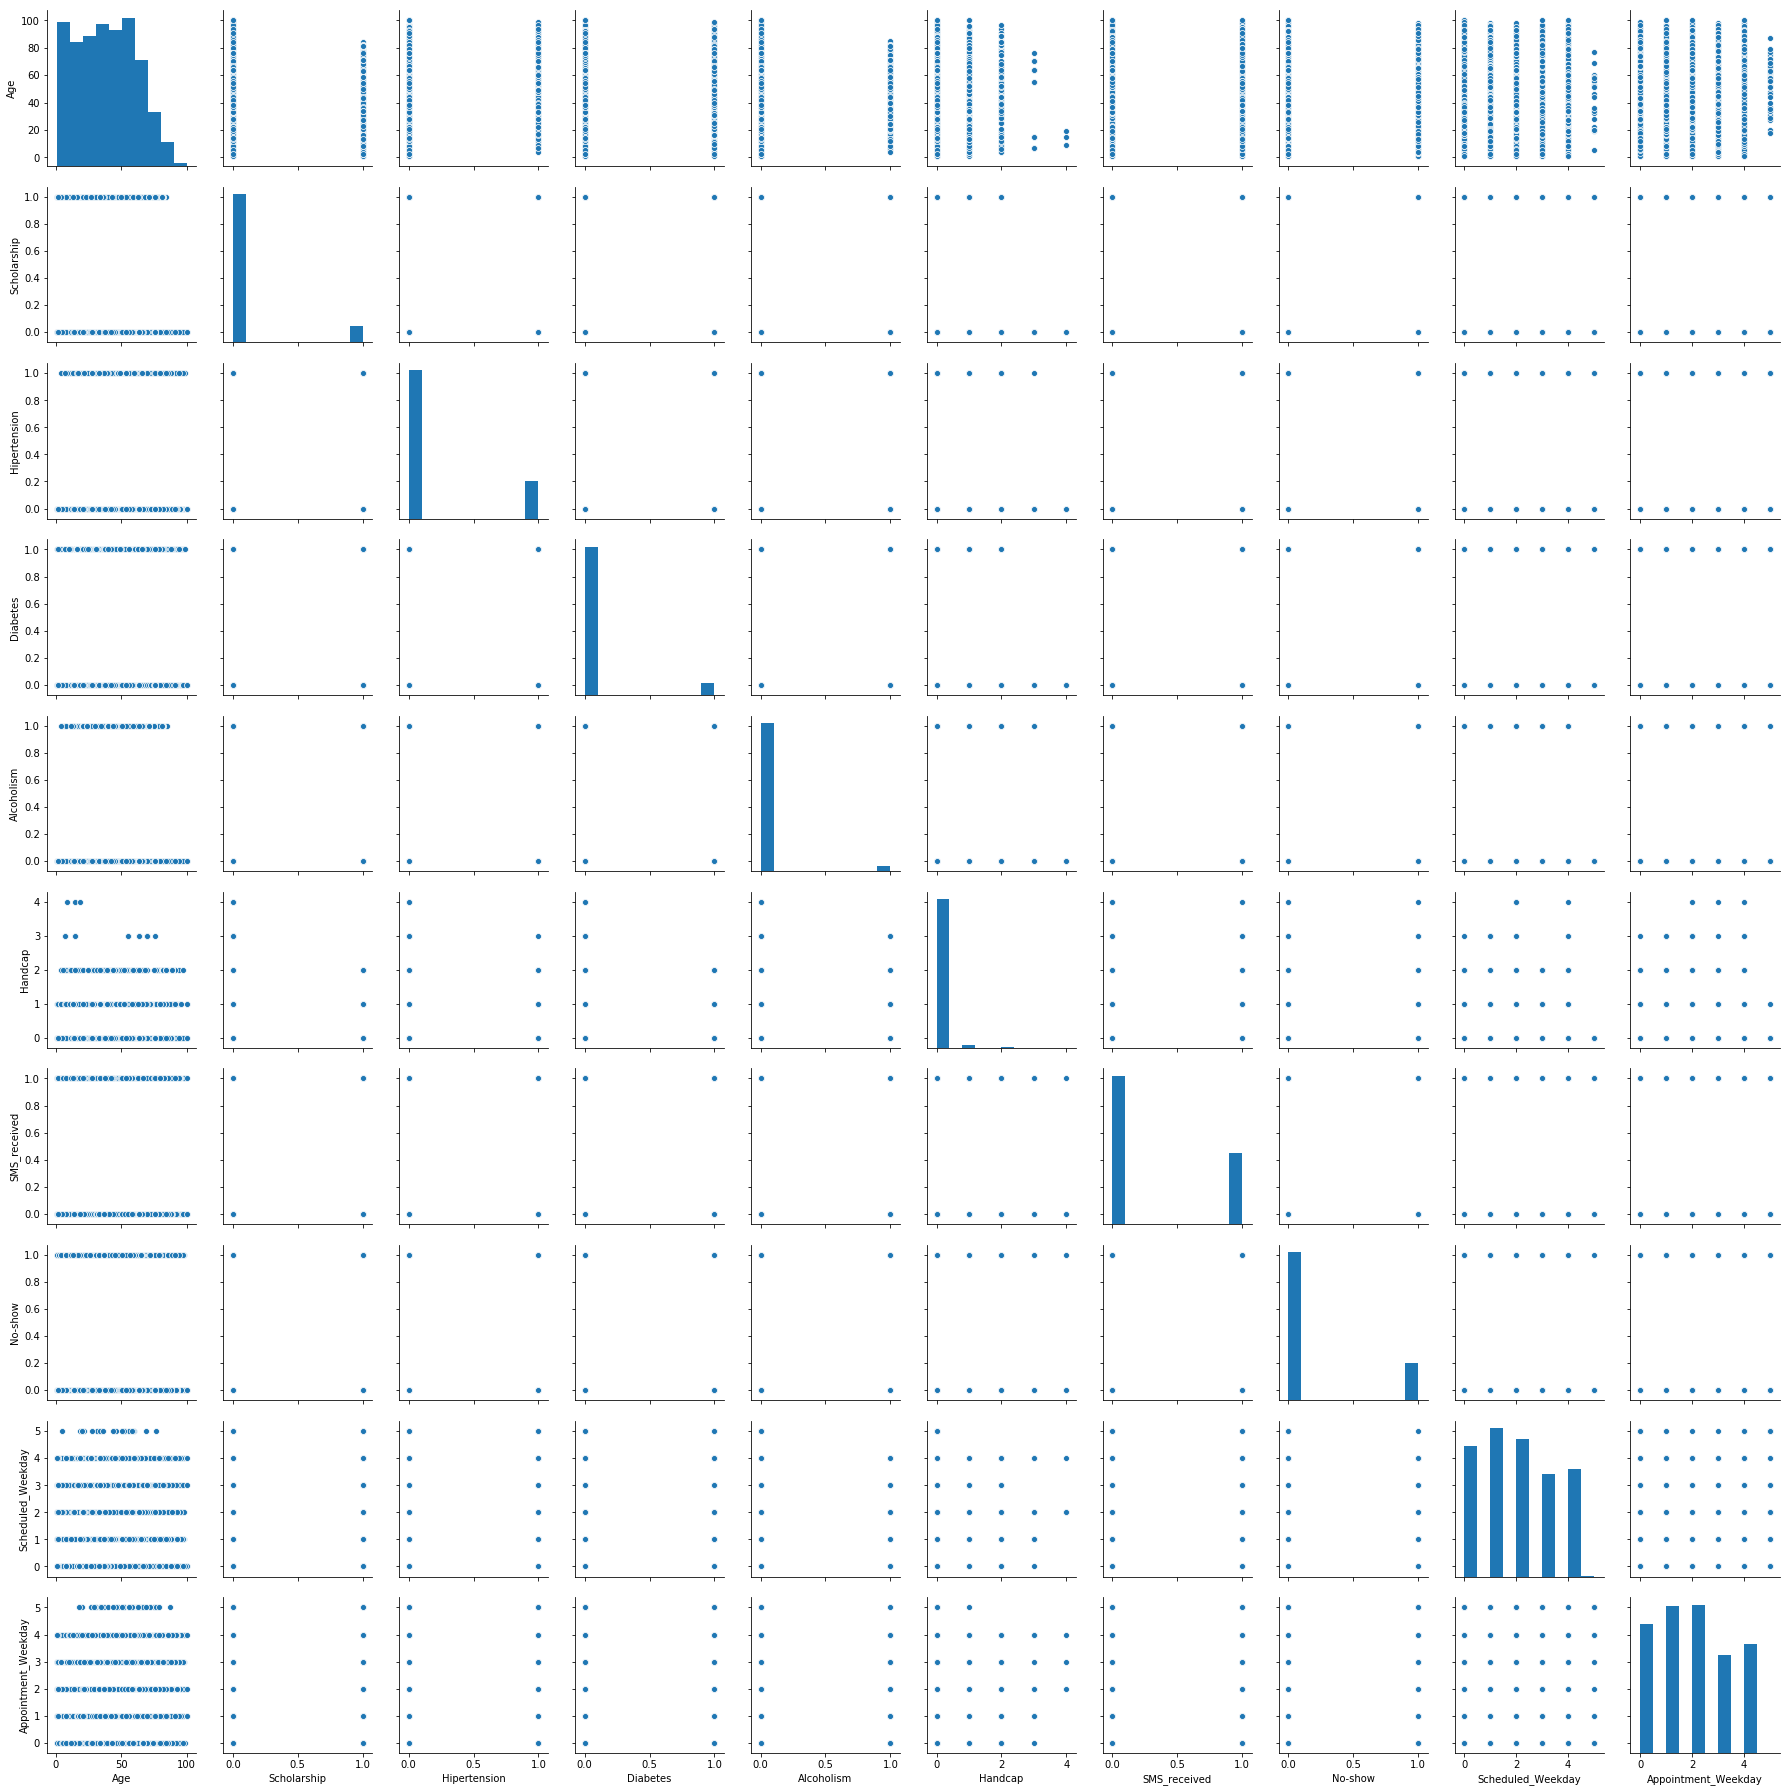

In [39]:
sns.pairplot(modified_df)

## Step 4: Conclusions and Limitations

Limitations:

1. The dataset is not balanced with respect to No-show labels. That is the dataset containes currently 25% people who did not show up on appointment. It is good if we have dataset balanced in equal propotions i.e. 50% each for show and Non-show

2. To understand this problem more on gender basis, the dataset is not balanced. It is clear from here that women show doctores more often than men but until the dataset is balanced it does not provides the clear picture.

Conclusions:

Without Limitations:
1. People tend to miss more appointments on weekends i.e. Fridays.
2. People in the age group 13-17 and 22-25 are more likely to miss appointments
3. There are >75% chances that People having Appointments in ILHAS OCEÂNICAS DE TRINDADE, INHANGUETÁ, JABOUR, JARDIM DA PENHA, JESUS DE NAZARETH, JOANA D´ARC , JUCUTUQUARA
will not show up
4. People who have scholarhsips tend to miss appointments more than people who don't have
5. People who have no hypertension are more likely to miss appointment than people who have.
6. People who have not received SMS are more likely to show up than the people who received SMS!!

    
With Limitations:
    
1. Women see more often than men, but gender does no contributes in any case if the person will show up or not
2. Most of the appointments are scheduled on Tuesday but the weekday of scheduling does not directly relates to No-show. Although on If Scheduled on Friday there are less chances of Cancellation but this is not conclusive as we don't have enough data
3. There asre greater chances that people don't turn up on Friday's and Saturday but we don't have enough data to prove for Saturday.
4. People of age 99 miss the appointment but there is only 1 record to support this claim. Hence it may or maynot be valid
5. People who are handicapped with Level 3 and above are more likely to miss appointment but we do not have enough data to support this claim